In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../utils/")
import gcn_tools as gc
from gcn_tools import *

In [2]:
df_viviendas= pd.read_excel("../data_sample/Viviendas_y_consumo_seleccion_cols.xlsx")
df_viviendas

,ubicacion,Viviendas totales,Viviendas vacías,Mediana consumo anual,Viviendas con bajo consumo,Viviendas de uso esporádico
0,Total Nacional,26623708,3828307,2196,941637,2517628
1,01 Andalucía,4673007,641572,2497,138020,415900
2,04 Almería,433763,73222,2333,16069,45653
3,04001 Abla,1076,225,1536,79,173
4,04002 Abrucena *,921,139,1646,67,161
...,...,...,...,...,...,...
3252,51 Ceuta,28315,4089,2150,431,1778
3253,51001 Ceuta *,28315,4089,2150,431,1778
3254,19 Melilla,29347,2946,2434,660,2129
3255,52 Melilla,29347,2946,2434,660,2129


In [3]:
# CALCULO DEL TARGET

In [4]:
df_viviendas["%_casas_vacias"]=(df_viviendas["Viviendas vacías"]/df_viviendas["Viviendas totales"])*100
df_viviendas=df_viviendas.drop(columns="Viviendas vacías")

<Axes: >

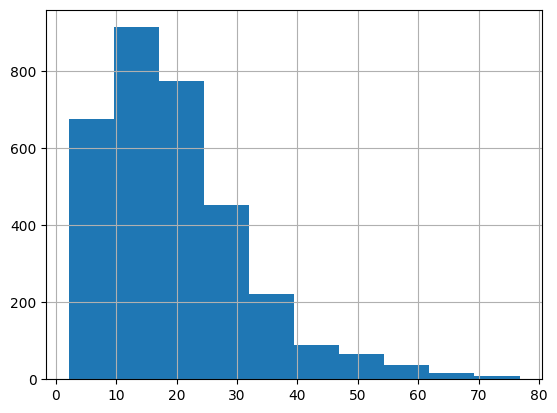

In [5]:
df_viviendas["%_casas_vacias"].hist()

In [7]:
df_genero_edad=pd.read_excel("../data_sample/sexo_grupo_edad_cols_selec.xlsx")
df_genero_edad

,ubicacion,Poblacion,Poblacion_-16,Poblacion_16-64,Poblacion_+65,Hombres,Hombres_-16,Hombres_16-64,Hombres_+65,Mujeres,Mujeres_-16,Mujeres_16-64,Mujeres_+65
0,Total Nacional,47400798,7209005,30880309,9311484,23248611,3709872,15499982,4038757,24152187,3499133,15380327,5272727
1,01051 Agurain/Salvatierra,5022,980,3167,875,2525,504,1620,401,2497,476,1547,474
2,01001 Alegría-Dulantzi,2924,593,1968,363,1518,320,1027,171,1406,273,941,192
3,01002 Amurrio,10295,1667,6309,2319,5085,880,3156,1049,5210,787,3153,1270
4,01049 Añana,154,11,100,43,93,6,66,21,61,5,34,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,"50296 Zaida, La",432,37,263,132,221,18,140,63,211,19,123,69
8128,50297 Zaragoza,681430,100503,433650,147277,326196,51780,213437,60979,355234,48723,220213,86298
8129,50298 Zuera,8612,1442,5843,1327,4445,731,3089,625,4167,711,2754,702
8130,51001 Ceuta,84071,17667,56079,10325,42536,9021,28856,4659,41535,8646,27223,5666


In [8]:
df_residencia_previa=pd.read_excel("../data_sample/previa_residencia_10años_col_selec.xlsx")
df_residencia_previa

,ubicacion,prev_res_misma_vivienda,prev_res_mismo_municipio,prev_res_misma_provincia,prev_res_misma_comunidad,prev_res_dif_comunidad,prev_res_en_extranjero,prev_res_no_nacido
0,Total Nacional,14609809,19325868,3981497,582479,1877878,2833838,4188420
1,01051 Agurain/Salvatierra,1646,1826,348,91,230,248,633
2,01001 Alegría-Dulantzi,1343,652,244,68,221,101,294
3,01002 Amurrio,2782,4888,472,396,324,357,1076
4,01049 Añana,67,32,36,3,10,3,3
...,...,...,...,...,...,...,...,...
8127,"50296 Zaida, La",113,244,33,5,9,3,25
8128,50297 Zaragoza,198571,328783,21946,8225,25482,39070,59332
8129,50298 Zuera,2454,2945,840,129,519,846,878
8130,51001 Ceuta,27388,35918,0,0,7856,2589,10317


In [9]:
df_residencia_previa.columns = df_residencia_previa.columns.str.strip()
df_genero_edad.columns = df_genero_edad.columns.str.strip()
df_gen_edad_prev_res=df_residencia_previa.merge(df_genero_edad,on="ubicacion",how="inner")
df_gen_edad_prev_res

,ubicacion,prev_res_misma_vivienda,prev_res_mismo_municipio,prev_res_misma_provincia,prev_res_misma_comunidad,prev_res_dif_comunidad,prev_res_en_extranjero,prev_res_no_nacido,Poblacion,Poblacion_-16,Poblacion_16-64,Poblacion_+65,Hombres,Hombres_-16,Hombres_16-64,Hombres_+65,Mujeres,Mujeres_-16,Mujeres_16-64,Mujeres_+65
0,Total Nacional,14609809,19325868,3981497,582479,1877878,2833838,4188420,47400798,7209005,30880309,9311484,23248611,3709872,15499982,4038757,24152187,3499133,15380327,5272727
1,01051 Agurain/Salvatierra,1646,1826,348,91,230,248,633,5022,980,3167,875,2525,504,1620,401,2497,476,1547,474
2,01001 Alegría-Dulantzi,1343,652,244,68,221,101,294,2924,593,1968,363,1518,320,1027,171,1406,273,941,192
3,01002 Amurrio,2782,4888,472,396,324,357,1076,10295,1667,6309,2319,5085,880,3156,1049,5210,787,3153,1270
4,01049 Añana,67,32,36,3,10,3,3,154,11,100,43,93,6,66,21,61,5,34,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,"50296 Zaida, La",113,244,33,5,9,3,25,432,37,263,132,221,18,140,63,211,19,123,69
8128,50297 Zaragoza,198571,328783,21946,8225,25482,39070,59332,681430,100503,433650,147277,326196,51780,213437,60979,355234,48723,220213,86298
8129,50298 Zuera,2454,2945,840,129,519,846,878,8612,1442,5843,1327,4445,731,3089,625,4167,711,2754,702
8130,51001 Ceuta,27388,35918,0,0,7856,2589,10317,84071,17667,56079,10325,42536,9021,28856,4659,41535,8646,27223,5666


In [10]:
df_viviendas["codigo_ine"] = df_viviendas["ubicacion"].str.extract(r'(\d{5})')
df_gen_edad_prev_res["codigo_ine"] = df_gen_edad_prev_res["ubicacion"].str.extract(r'(\d{5})')

In [11]:
print(df_viviendas["codigo_ine"].isin(df_gen_edad_prev_res["codigo_ine"]).sum())
print(df_gen_edad_prev_res["codigo_ine"].isin(df_viviendas["codigo_ine"]).sum())

3211
3140


In [12]:
df_merge_reduc= df_viviendas.merge(df_gen_edad_prev_res,on="codigo_ine",how="inner")
df_merge_reduc=df_merge_reduc.dropna()
df_merge_reduc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3139 entries, 3 to 3210
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ubicacion_x                  3139 non-null   object 
 1   Viviendas totales            3139 non-null   int64  
 2   Mediana consumo anual        3139 non-null   int64  
 3   Viviendas con bajo consumo   3139 non-null   int64  
 4   Viviendas de uso esporádico  3139 non-null   int64  
 5   %_casas_vacias               3139 non-null   float64
 6   codigo_ine                   3139 non-null   object 
 7   ubicacion_y                  3139 non-null   object 
 8   prev_res_misma_vivienda      3139 non-null   int64  
 9   prev_res_mismo_municipio     3139 non-null   int64  
 10  prev_res_misma_provincia     3139 non-null   int64  
 11  prev_res_misma_comunidad     3139 non-null   int64  
 12  prev_res_dif_comunidad       3139 non-null   int64  
 13  prev_res_en_extranjero 

In [13]:
df_merge_reduc

,ubicacion_x,Viviendas totales,Mediana consumo anual,Viviendas con bajo consumo,Viviendas de uso esporádico,%_casas_vacias,codigo_ine,ubicacion_y,prev_res_misma_vivienda,prev_res_mismo_municipio,...,Poblacion_16-64,Poblacion_+65,Hombres,Hombres_-16,Hombres_16-64,Hombres_+65,Mujeres,Mujeres_-16,Mujeres_16-64,Mujeres_+65
3,04001 Abla,1076,1536,79,173,20.910781,04001,04001 Abla,336,585,...,757,371,648,75,401,172,612,57,356,199
4,04002 Abrucena *,921,1646,67,161,15.092291,04002,04002 Abrucena,230,635,...,762,342,640,59,418,163,572,49,344,179
5,04003 Adra,12315,2133,419,1252,9.654892,04003,04003 Adra,7564,11624,...,17432,3676,13062,2297,9124,1641,12420,2077,8308,2035
6,04006 Albox,6919,2406,220,569,21.968493,04006,04006 Albox,2761,5262,...,7889,2469,6327,1027,4123,1177,6009,951,3766,1292
7,04011 Alhama de Almería,2336,2322,83,251,20.890411,04011,04011 Alhama de Almería,1058,1630,...,2440,695,1880,316,1258,306,1864,293,1182,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,26138 Santo Domingo de la Calzada *,4931,1565,459,894,14.053944,26138,26138 Santo Domingo de la Calzada,1990,2582,...,3863,1383,3134,513,1993,628,3079,454,1870,755
3203,26142 San Vicente de la Sonsierra,1266,1345,157,227,25.592417,26142,26142 San Vicente de la Sonsierra,242,497,...,651,253,532,51,367,114,478,55,284,139
3204,26168 Villamediana de Iregua *,5195,1738,309,768,7.776708,26168,26168 Villamediana de Iregua,3145,1365,...,5947,806,4351,975,3012,364,4244,867,2935,442
3207,51001 Ceuta *,28315,2150,431,1778,14.441109,51001,51001 Ceuta,27388,35918,...,56079,10325,42536,9021,28856,4659,41535,8646,27223,5666


In [14]:
df_merge_reduc = df_merge_reduc.drop(columns=["ubicacion_x"])
df_merge_reduc = df_merge_reduc.rename(columns={"ubicacion_y": "ubicacion"})
column_order_1 = ["ubicacion", "codigo_ine"] + [col for col in df_merge_reduc.columns if col not in ["ubicacion", "codigo_ine"]]
df_merge_reduc = df_merge_reduc[column_order_1]

df_merge_reduc.head()

,ubicacion,codigo_ine,Viviendas totales,Mediana consumo anual,Viviendas con bajo consumo,Viviendas de uso esporádico,%_casas_vacias,prev_res_misma_vivienda,prev_res_mismo_municipio,prev_res_misma_provincia,...,Poblacion_16-64,Poblacion_+65,Hombres,Hombres_-16,Hombres_16-64,Hombres_+65,Mujeres,Mujeres_-16,Mujeres_16-64,Mujeres_+65
3,04001 Abla,04001,1076,1536,79,173,20.910781,336,585,151,...,757,371,648,75,401,172,612,57,356,199
4,04002 Abrucena,04002,921,1646,67,161,15.092291,230,635,161,...,762,342,640,59,418,163,572,49,344,179
5,04003 Adra,04003,12315,2133,419,1252,9.654892,7564,11624,961,...,17432,3676,13062,2297,9124,1641,12420,2077,8308,2035
6,04006 Albox,04006,6919,2406,220,569,21.968493,2761,5262,809,...,7889,2469,6327,1027,4123,1177,6009,951,3766,1292
7,04011 Alhama de Almería,04011,2336,2322,83,251,20.890411,1058,1630,374,...,2440,695,1880,316,1258,306,1864,293,1182,389


In [17]:
df_geo_datos=pd.read_csv("../data_sample/geo_datos.csv",sep=";", decimal=",", encoding="latin1")
df_geo_datos

,COD_INE,ID_REL,codigo_ine,PROVINCIA,ubicacion,SUPERFICIE,PERIMETRO,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD
0,1001000000,1010014,1010,Araba/Álava,Alegría-Dulantzi,1994.5872,35069,-2.512437,42.839812,568.0
1,1002000000,1010029,1020,Araba/Álava,Amurrio,9629.6800,65381,-3.000073,43.054278,219.0
2,1003000000,1010035,1030,Araba/Álava,Aramaio,7308.9600,42097,-2.565400,43.051197,333.0
3,1004000000,1010040,1040,Araba/Álava,Artziniega,2728.7300,22886,-3.127917,43.120844,210.0
4,1006000000,1010066,1060,Araba/Álava,Armiñón,1297.2700,24707,-2.871835,42.723262,467.0
...,...,...,...,...,...,...,...,...,...,...
8127,50901000000,1509017,50147,Zaragoza,Biel,13072.6145,52961,-0.936572,42.387568,755.0
8128,50902000000,1509022,50472,Zaragoza,Marracos,1700.3800,20344,-0.776416,42.090917,413.0
8129,50903000000,1509038,50844,Zaragoza,Villamayor de Gállego,8936.4544,44874,-0.770533,41.684198,232.0
8130,51001000000,1510013,51001,Ceuta,Ceuta,1987.0000,42546,-5.306751,35.888102,27.0


In [18]:
df_paro=pd.read_csv("../data_sample/paro_municipal.csv",sep=";", encoding="latin1")
df_paro=df_paro.drop(columns="codigo_ine")
df_paro

,Comunidad Autónoma,Provincia,ubicacion,total Paro Registrado,Paro hombre edad < 25,Paro hombre edad 25 -45,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro mujer edad >=45,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior
0,Andalucía,Almería,Abla,73,<5,7,29,0,14,21,13,<5,7,43,6
1,Andalucía,Almería,Abrucena,50,<5,5,17,<5,15,10,6,<5,5,32,5
2,Andalucía,Almería,Adra,1689,85,234,341,73,418,538,280,50,169,1002,188
3,Andalucía,Almería,Albánchez,27,<5,<5,10,<5,<5,8,<5,<5,<5,20,<5
4,Andalucía,Almería,Alboloduy,24,<5,<5,11,0,5,5,<5,5,5,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,"Rioja, La","Rioja, La",Zarratón,12,<5,<5,<5,0,<5,<5,6,<5,0,<5,0
8130,"Rioja, La","Rioja, La",Zarzosa,0,0,0,0,0,0,0,0,0,0,0,0
8131,"Rioja, La","Rioja, La",Zorraquín,<5,0,<5,0,0,0,0,0,0,0,<5,0
8132,Ceuta,Ceuta,Ceuta,10356,644,1433,1869,683,2878,2849,42,283,469,7818,1744


In [19]:
df_geo_y_paro=df_paro.merge(df_geo_datos,on="ubicacion",how="inner")
df_geo_y_paro=df_geo_y_paro.drop(columns=["codigo_ine","ID_REL","PROVINCIA"])
df_geo_y_paro

,Comunidad Autónoma,Provincia,ubicacion,total Paro Registrado,Paro hombre edad < 25,Paro hombre edad 25 -45,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro mujer edad >=45,...,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior,COD_INE,SUPERFICIE,PERIMETRO,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD
0,Andalucía,Almería,Abla,73,<5,7,29,0,14,21,...,<5,7,43,6,4001000000,4524.4244,46589,-2.779540,37.141210,853.0
1,Andalucía,Almería,Abrucena,50,<5,5,17,<5,15,10,...,<5,5,32,5,4002000000,8367.7470,58614,-2.797467,37.132183,986.0
2,Andalucía,Almería,Adra,1689,85,234,341,73,418,538,...,50,169,1002,188,4003000000,8969.4500,51619,-3.023303,36.748683,14.0
3,Andalucía,Almería,Alboloduy,24,<5,<5,11,0,5,5,...,5,5,12,0,4005000000,6973.4477,47842,-2.621686,37.033396,381.0
4,Andalucía,Almería,Albox,705,29,104,148,39,179,206,...,55,82,435,88,4006000000,16827.6000,61380,-2.146835,37.389678,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,"Rioja, La","Rioja, La",Zarratón,12,<5,<5,<5,0,<5,<5,...,<5,0,<5,0,26180000000,1866.4400,22210,-2.882491,42.515780,562.0
7451,"Rioja, La","Rioja, La",Zarzosa,0,0,0,0,0,0,0,...,0,0,0,0,26181000000,1829.3602,24492,-2.342861,42.182169,978.0
7452,"Rioja, La","Rioja, La",Zorraquín,<5,0,<5,0,0,0,0,...,0,0,<5,0,26183000000,643.7444,11888,-3.038927,42.325808,863.0
7453,Ceuta,Ceuta,Ceuta,10356,644,1433,1869,683,2878,2849,...,283,469,7818,1744,51001000000,1987.0000,42546,-5.306751,35.888102,27.0


In [20]:
df_geo_y_paro.columns

Index(['Comunidad Autónoma', 'Provincia', 'ubicacion', 'total Paro Registrado',
       'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ',
       'Paro hombre edad >=45', 'Paro mujer edad < 25',
       'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura',
       'Paro Industria', 'Paro Construcción', 'Paro Servicios',
       'Paro Sin empleo Anterior', 'COD_INE', 'SUPERFICIE', 'PERIMETRO',
       'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD'],
      dtype='object')

In [21]:
cols_paro= [col for col in df_geo_y_paro.columns if "Paro" in col]
cols_paro

['total Paro Registrado',
 'Paro hombre edad < 25',
 'Paro hombre edad 25 -45 ',
 'Paro hombre edad >=45',
 'Paro mujer edad < 25',
 'Paro mujer edad 25 -45 ',
 'Paro mujer edad >=45',
 'Paro Agricultura',
 'Paro Industria',
 'Paro Construcción',
 'Paro Servicios',
 'Paro Sin empleo Anterior']

In [22]:
def arreglar_datos_paro(i):
    if i=="<5":
        return np.random.randint(1,6)
    else:
        return i

df_geo_y_paro[cols_paro]=df_geo_y_paro[cols_paro].applymap(arreglar_datos_paro)
df_geo_y_paro[cols_paro] = df_geo_y_paro[cols_paro].astype(int)

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_12592\2172923994.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_geo_y_paro[cols_paro]=df_geo_y_paro[cols_paro].applymap(arreglar_datos_paro)


In [24]:
df_geo_y_paro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7455 entries, 0 to 7454
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comunidad Autónoma        7455 non-null   object 
 1   Provincia                 7455 non-null   object 
 2   ubicacion                 7455 non-null   object 
 3   total Paro Registrado     7455 non-null   int32  
 4   Paro hombre edad < 25     7455 non-null   int32  
 5   Paro hombre edad 25 -45   7455 non-null   int32  
 6   Paro hombre edad >=45     7455 non-null   int32  
 7   Paro mujer edad < 25      7455 non-null   int32  
 8   Paro mujer edad 25 -45    7455 non-null   int32  
 9   Paro mujer edad >=45      7455 non-null   int32  
 10  Paro Agricultura          7455 non-null   int32  
 11  Paro Industria            7455 non-null   int32  
 12  Paro Construcción         7455 non-null   int32  
 13  Paro Servicios            7455 non-null   int32  
 14  Paro Sin

In [ ]:
# Función para transformar COD_INE
def transformar_codigo(valor):
    """
    Transforma el código según las siguientes reglas:
    - Si tiene 10 dígitos y los últimos 6 son ceros, elimina los últimos 6 y añade un 0 al inicio.
    - Si tiene 11 dígitos y los últimos 6 son ceros, elimina los últimos 6.
    - Si no cumple con estas condiciones, devuelve NaN.
    """
    valor = str(valor).strip()  # Convertir a string y eliminar espacios extra
    
    if len(valor) == 10 and valor[-6:] == "000000":
        return "0" + valor[:-6]  # Agregar un 0 delante y quitar los últimos 6
    elif len(valor) == 11 and valor[-6:] == "000000":
        return valor[:-6]  # Quitar los últimos 6
    else:
        return np.nan  # Si no cumple las condiciones, devolver NaN


df_geo_y_paro["codigo_ine"] = df_geo_y_paro["COD_INE"].apply(transformar_codigo)


In [26]:
df_geo_y_paro=df_geo_y_paro.drop(columns=["COD_INE","ubicacion"])

In [27]:
df_merge_reduc["codigo_ine"].isin(df_geo_y_paro["codigo_ine"]).sum()

2812

In [29]:
df_final=df_merge_reduc.merge(df_geo_y_paro,on="codigo_ine",how="inner")

In [30]:
df_final.head()

,ubicacion,codigo_ine,Viviendas totales,Mediana consumo anual,Viviendas con bajo consumo,Viviendas de uso esporádico,%_casas_vacias,prev_res_misma_vivienda,prev_res_mismo_municipio,prev_res_misma_provincia,...,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior,SUPERFICIE,PERIMETRO,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD
0,04001 Abla,04001,1076,1536,79,173,20.910781,336,585,151,...,13,3,7,43,6,4524.4244,46589,-2.779540,37.141210,853.0
1,04002 Abrucena,04002,921,1646,67,161,15.092291,230,635,161,...,6,4,5,32,5,8367.7470,58614,-2.797467,37.132183,986.0
2,04003 Adra,04003,12315,2133,419,1252,9.654892,7564,11624,961,...,280,50,169,1002,188,8969.4500,51619,-3.023303,36.748683,14.0
3,04006 Albox,04006,6919,2406,220,569,21.968493,2761,5262,809,...,45,55,82,435,88,16827.6000,61380,-2.146835,37.389678,422.0
4,04011 Alhama de Almería,04011,2336,2322,83,251,20.890411,1058,1630,374,...,26,29,23,172,31,2624.3750,25588,-2.569776,36.957183,520.0


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ubicacion                    2823 non-null   object 
 1   codigo_ine                   2823 non-null   object 
 2   Viviendas totales            2823 non-null   int64  
 3   Mediana consumo anual        2823 non-null   int64  
 4   Viviendas con bajo consumo   2823 non-null   int64  
 5   Viviendas de uso esporádico  2823 non-null   int64  
 6   %_casas_vacias               2823 non-null   float64
 7   prev_res_misma_vivienda      2823 non-null   int64  
 8   prev_res_mismo_municipio     2823 non-null   int64  
 9   prev_res_misma_provincia     2823 non-null   int64  
 10  prev_res_misma_comunidad     2823 non-null   int64  
 11  prev_res_dif_comunidad       2823 non-null   int64  
 12  prev_res_en_extranjero       2823 non-null   int64  
 13  prev_res_no_nacido

In [ ]:
num_feats = df_final.select_dtypes(exclude=["object"]).columns.tolist()

['Viviendas totales',
 'Mediana consumo anual',
 'Viviendas con bajo consumo',
 'Viviendas de uso esporádico',
 '%_casas_vacias',
 'prev_res_misma_vivienda',
 'prev_res_mismo_municipio',
 'prev_res_misma_provincia',
 'prev_res_misma_comunidad',
 'prev_res_dif_comunidad',
 'prev_res_en_extranjero',
 'prev_res_no_nacido',
 'Poblacion',
 'Poblacion_-16',
 'Poblacion_16-64',
 'Poblacion_+65',
 'Hombres',
 'Hombres_-16',
 'Hombres_16-64',
 'Hombres_+65',
 'Mujeres',
 'Mujeres_-16',
 'Mujeres_16-64',
 'Mujeres_+65',
 'total Paro Registrado',
 'Paro hombre edad < 25',
 'Paro hombre edad 25 -45 ',
 'Paro hombre edad >=45',
 'Paro mujer edad < 25',
 'Paro mujer edad 25 -45 ',
 'Paro mujer edad >=45',
 'Paro Agricultura',
 'Paro Industria',
 'Paro Construcción',
 'Paro Servicios',
 'Paro Sin empleo Anterior',
 'SUPERFICIE',
 'PERIMETRO',
 'LONGITUD_ETRS89',
 'LATITUD_ETRS89',
 'ALTITUD']

In [1]:
#BASELINE_PRIMERA_PRUEBA

In [33]:
df_prueba_1=df_final[num_feats].copy()
X=df_prueba_1.copy().drop(columns="%_casas_vacias")
y=df_prueba_1.copy()["%_casas_vacias"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (2258, 40)
Tamaño de X_test: (565, 40)
Tamaño de y_train: (2258,)
Tamaño de y_test: (565,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae:.2f}")
print(f"Random Forest - RMSE: {rmse:.2f}")
print(f"Random Forest - R²: {r2:.4f}")


Random Forest - MAE: 4.59
Random Forest - RMSE: 6.20
Random Forest - R²: 0.7638
